In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from shutil import copyfile

In [2]:
#writeIn('109').astype('int64').astype('str')[0]

In [3]:
#np.load('annotations/19_aro.npy')

#np.load('annotations/0_lnd.npy')

#np.load('annotations/0_val.npy')

path_img = 'val_set/'
dir_list = os.listdir(path_img+'images')
 
filenames = [".".join(f.split(".")[:-1]) for f in dir_list]
print(len(filenames))
dicti = {
    0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger',
7: 'Contempt', 8: None
}

dicti[int(np.load(path_img+'annotations/78_exp.npy').astype('int64'))]

def arr2img(inp,df=None, patH=True):
    if patH:
        print(dicti[int(np.load(path_img+'annotations/'+str(inp)+'_exp.npy').astype('int64'))])
        inp = path_img+'images/'+str(inp)+'.jpg'
        return Image.fromarray(plt.imread(inp).reshape(1,-1)[0].reshape((224,224,3)))
    inp = df.loc[int(inp)]
    print(dicti[inp.values[-3]])
    inp = inp.values[:-3]
    return Image.fromarray(inp.reshape((224,224,3)).astype(np.uint8))

def writeIn(num,opt='exp'):
    #print(np.load('annotations/'+str(num)+'_'+str(opt)+'.npy'))
    return np.array([float(np.load(path_img+'annotations/'+num+'_'+str(opt)+'.npy'))])
'''
def add_row(df,i,num):
    Arr=np.concatenate((plt.imread('images/'+num+'.jpg').reshape(1,-1)[0],writeIn(num,'exp'),writeIn(num,'aro'),writeIn(num,'val') ))
    df.loc[i]=Arr
    
def add_rows(df,s=0):
    n = len(filenames)
    for i in range(s,n):
        add_row(df,i,filenames[i])
        print(str(i)+': Image : ',filenames[i],' is added\n---------------------------------')
        
def add_img(src,dst):
    copyfile(src, dst)
 '''       


def add_imgs(s=0):
    n = len(filenames)
    for i in range(s,n):
        exp = writeIn(filenames[i]).astype('int64').astype('str')[0]
        src=path_img+'images/'+filenames[i]+'.jpg'
        dst = 'valSet/'+exp+'/'+filenames[i]+'.jpg'
        copyfile(src,dst)
        print(str(i)+': Image : ',filenames[i],' is added\n---------------------------------')
    

3999


In [4]:
len(os.listdir(path_img+'annotations'))/4

3999.0

Sadness


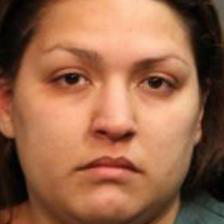

In [5]:
arr2img('109')

In [6]:
#add_row(df,0,'19')
#df.loc[0].values[:-3]

In [7]:
#arr2img(0,df,False)

In [9]:
add_imgs()

0: Image :  4717  is added
---------------------------------
1: Image :  919  is added
---------------------------------
2: Image :  3309  is added
---------------------------------
3: Image :  2206  is added
---------------------------------
4: Image :  2026  is added
---------------------------------
5: Image :  610  is added
---------------------------------
6: Image :  3614  is added
---------------------------------
7: Image :  1045  is added
---------------------------------
8: Image :  4720  is added
---------------------------------
9: Image :  1649  is added
---------------------------------
10: Image :  5231  is added
---------------------------------
11: Image :  3975  is added
---------------------------------
12: Image :  2129  is added
---------------------------------
13: Image :  4206  is added
---------------------------------
14: Image :  1628  is added
---------------------------------
15: Image :  1847  is added
---------------------------------
16: Image :  5223  i

In [10]:
c = 0
for i in range(8):
    print(dicti[i],' ',len(os.listdir('valSet/'+str(i))))
    c+=len(os.listdir('valSet/'+str(i)))
print(c)

Neutral   500
Happiness   500
Sadness   500
Surprise   500
Fear   500
Disgust   500
Anger   500
Contempt   499
3999


No handles with labels found to put in legend.


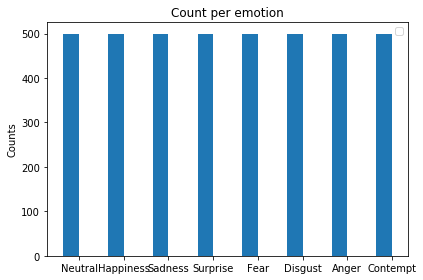

In [11]:
import matplotlib.pyplot as plt


labels = [dicti[i] for i in range(8)]
count = [len(os.listdir('valSet/'+str(i))) for i in range(8)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Count per emotion')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()